# Multiple Linear Regression
 
### Problem Statement:
BoomBikes aspires to understand the demand for shared bikes among the people after quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

The company wants to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. 

The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands .

# Step 1 Data Understanding

In [1102]:
import numpy as np
import pandas as pd

In [1103]:
# Importing input CSV file
bike = pd.read_csv(r'C:\Users\PC\Desktop\AI & ML\Linear regression\Multiple linear regression\day.csv')
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [1104]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [1105]:
bike.shape

(730, 16)

In [1106]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [1107]:
# Let's drop instant column which no where signficant in the model preparation

bike = bike.drop('instant', axis=1)
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      730 non-null    object 
 1   season      730 non-null    int64  
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    int64  
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    int64  
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    int64  
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  casual      730 non-null    int64  
 13  registered  730 non-null    int64  
 14  cnt         730 non-null    int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 85.7+ KB


All data points are non-null so no need to do any imputation further

# Step 2: Data visulisation

In [1110]:
import matplotlib.pyplot as plt
import seaborn as sns

### Numeric variable visulisation

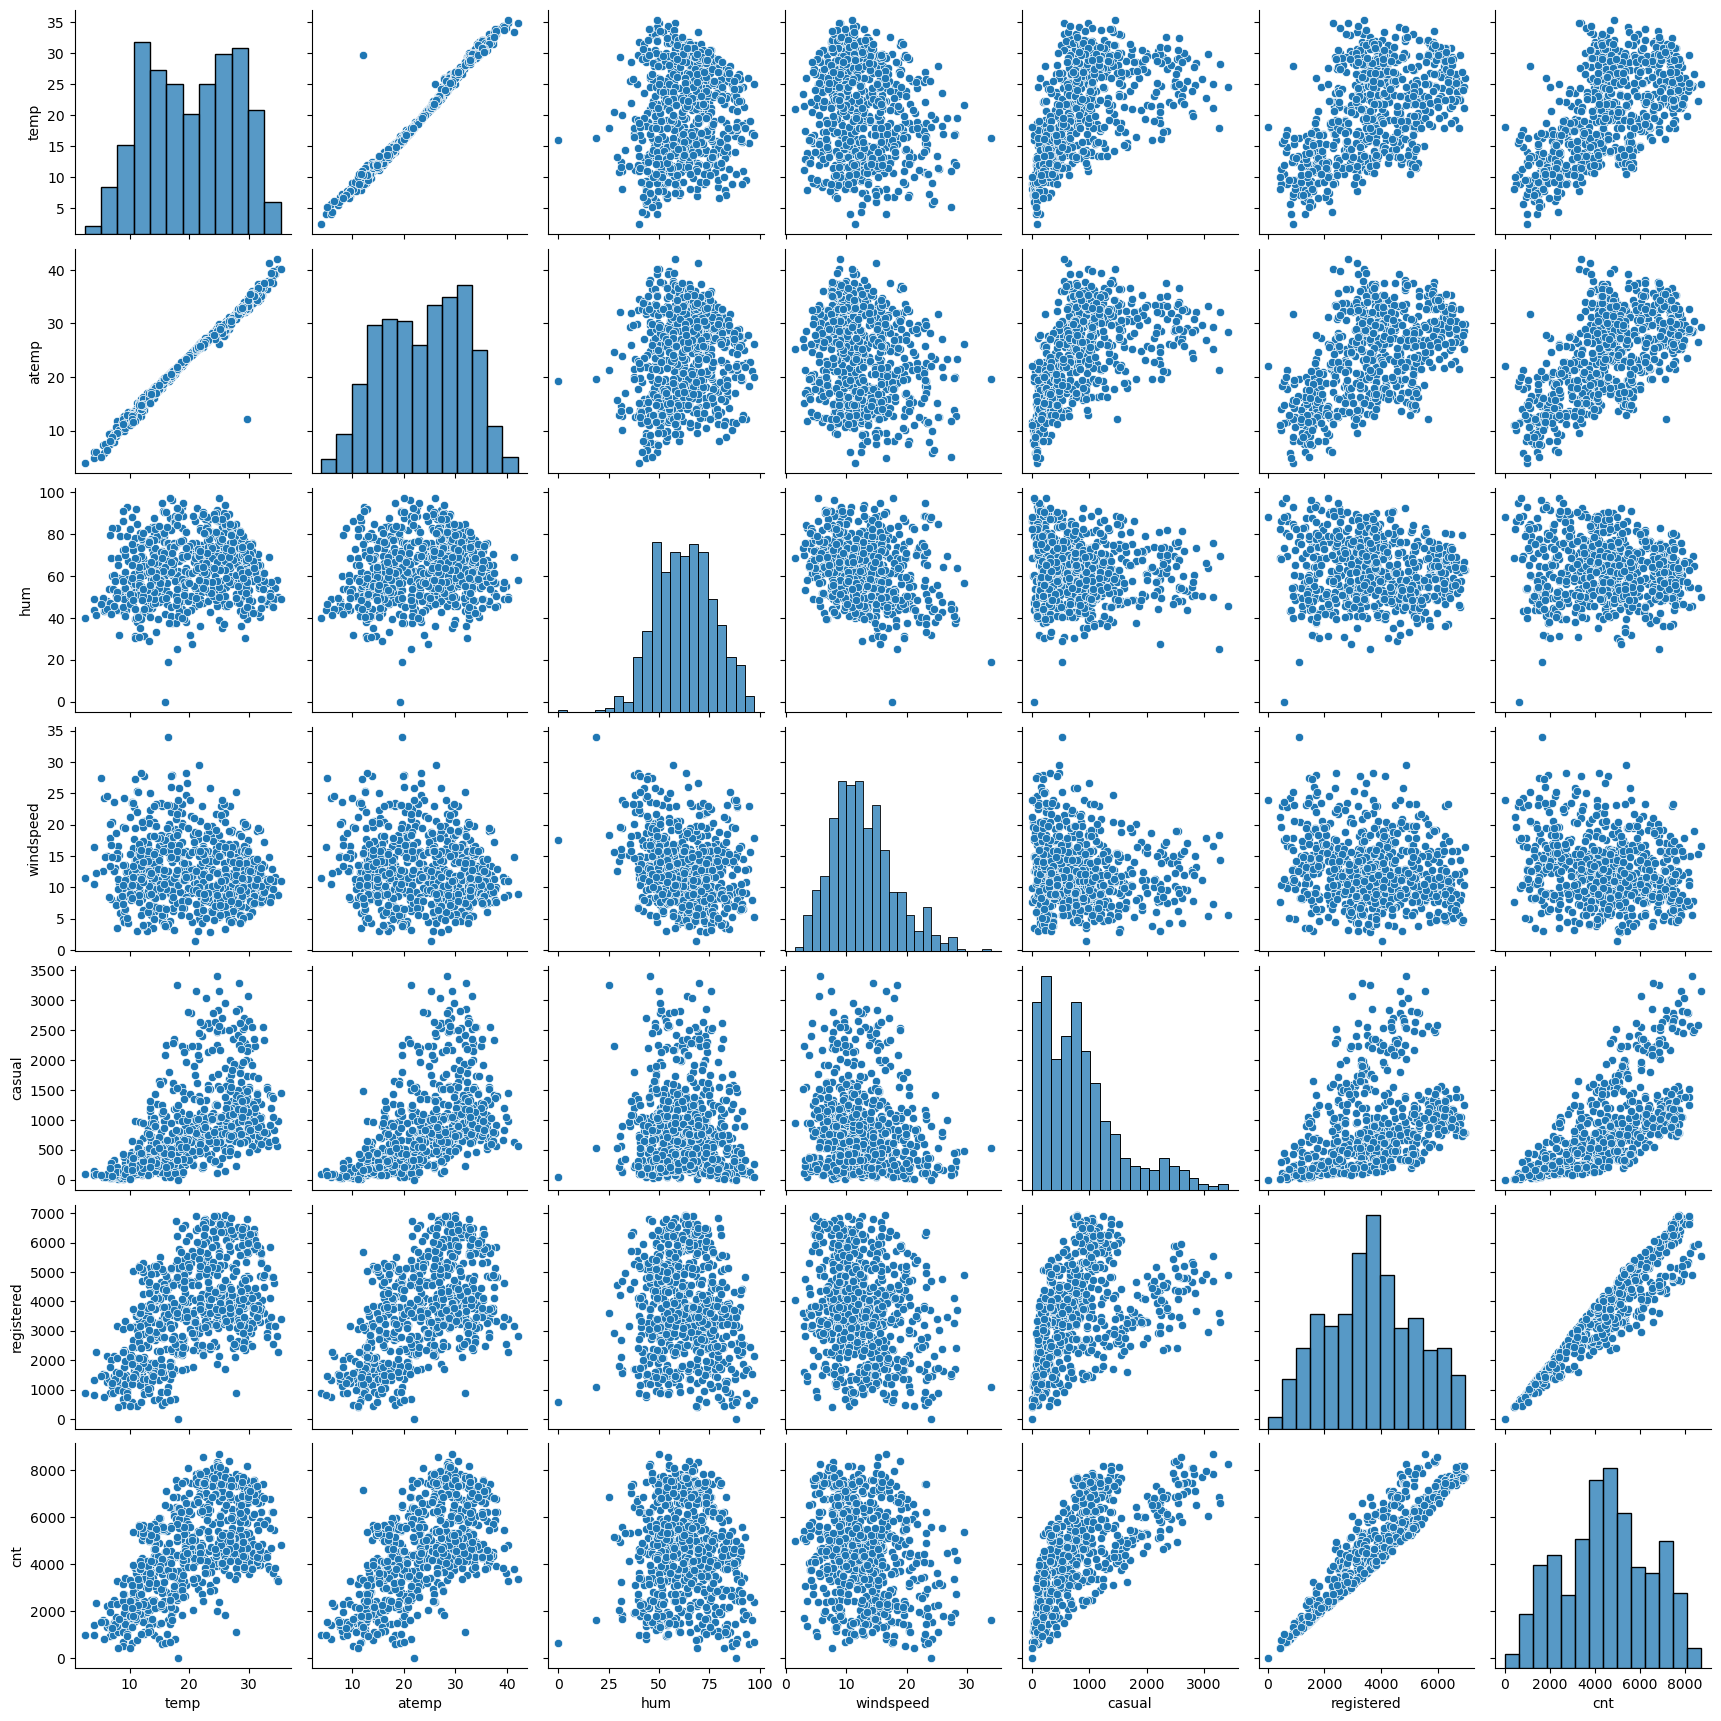

In [1112]:
# Draw pair plot for all numerical variables
numvar = ['temp','atemp','hum','windspeed','casual','registered','cnt']
sns.pairplot(bike[numvar])
plt.show()

Most of the numerical varaibles lineraly correlated with target cnt variable

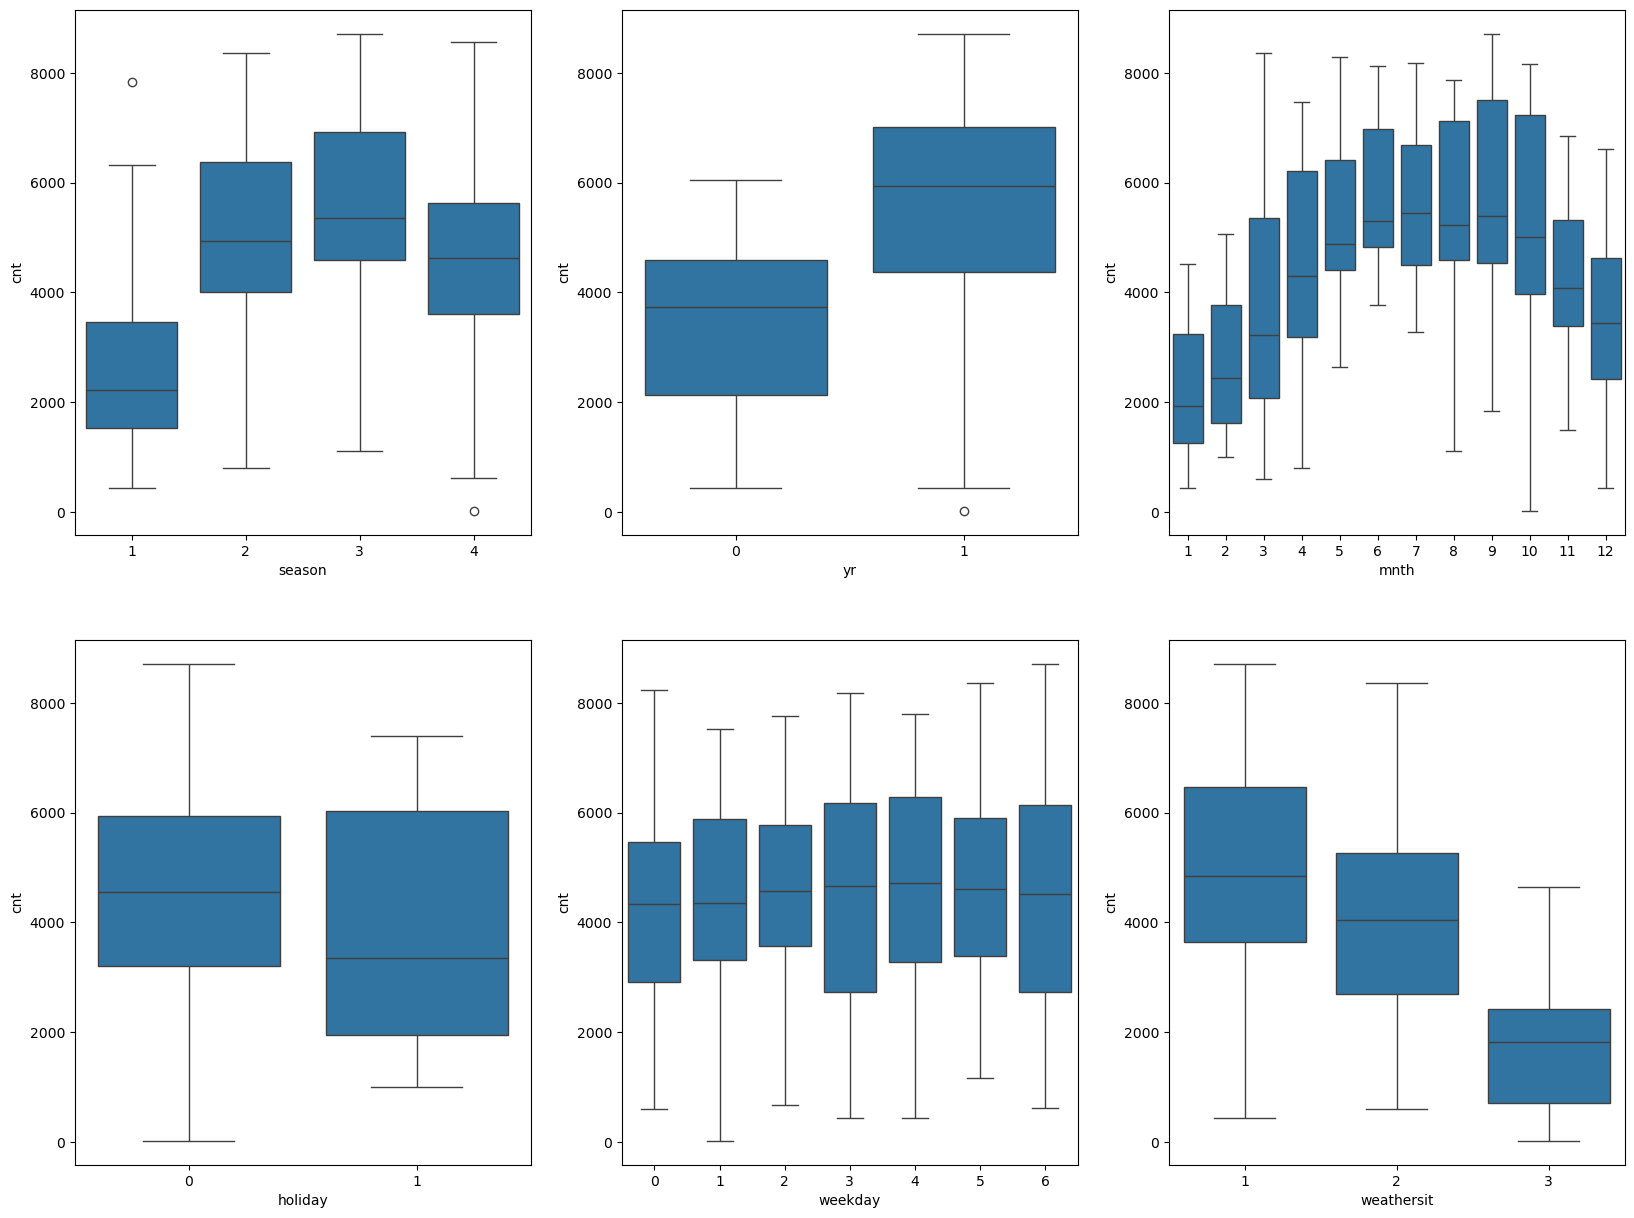

In [1114]:
# Draw Box Plots for categorical variables
plt.figure(figsize=(20,15))
plt.subplot(2,3,1)
sns.boxplot(x='season',y='cnt',data=bike)
plt.subplot(2,3,2)
sns.boxplot(x='yr',y='cnt',data=bike)
plt.subplot(2,3,3)
sns.boxplot(x='mnth',y='cnt',data=bike)
plt.subplot(2,3,4)
sns.boxplot(x='holiday',y='cnt',data=bike)
plt.subplot(2,3,5)
sns.boxplot(x='weekday',y='cnt',data=bike)
plt.subplot(2,3,6)
sns.boxplot(x='weathersit',y='cnt',data=bike)
plt.show()

## Observation from EDA
1. season : There is postive trend in seasons
2. year: year on year on the user count ingreased. good progression
3. month: There is postive trend in months
4. holiday: On a holiday, the number of users are more
5. weekday: There is no specific trend on weekdays
6. weatherlist: on clear waether, the number of bike user are more

In [1116]:
# Drop the column date as it is getting described in year,month and weekday/holiday columns
bike = bike.drop('dteday', axis=1)
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  casual      730 non-null    int64  
 12  registered  730 non-null    int64  
 13  cnt         730 non-null    int64  
dtypes: float64(4), int64(10)
memory usage: 80.0 KB


In [1117]:
# let's find out the correlation
bike.corr()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
season,1.000000e+00,-3.279074e-16,8.310321e-01,-0.010868,-0.003081,0.013762,0.021306,0.333361,0.342014,0.208220,-0.229607,0.208737,0.410310,0.404584
yr,-3.279074e-16,1.000000e+00,-5.162656e-16,0.008195,-0.005466,-0.002945,-0.050322,0.048789,0.047215,-0.112547,-0.011624,0.250502,0.596911,0.569728
mnth,8.310321e-01,-5.162656e-16,1.000000e+00,0.018905,0.009523,-0.004688,0.045613,0.219083,0.226430,0.224937,-0.208013,0.121208,0.291952,0.278191
holiday,-1.086804e-02,8.195345e-03,1.890483e-02,1.000000,-0.101962,-0.252948,-0.034395,-0.028764,-0.032703,-0.015662,0.006257,0.054055,-0.109142,-0.068764
weekday,-3.081198e-03,-5.466369e-03,9.522969e-03,-0.101962,1.000000,0.035800,0.031112,-0.000168,-0.007539,-0.052290,0.014283,0.059978,0.057427,0.067534
workingday,1.376178e-02,-2.945396e-03,-4.687953e-03,-0.252948,0.035800,1.000000,0.060236,0.053470,0.052940,0.023202,-0.018666,-0.517607,0.305437,0.062542
weathersit,2.130636e-02,-5.032247e-02,4.561335e-02,-0.034395,0.031112,0.060236,1.000000,-0.119503,-0.120559,0.590277,0.039769,-0.246044,-0.259025,-0.295929
temp,3.333607e-01,4.878919e-02,2.190833e-01,-0.028764,-0.000168,0.053470,-0.119503,1.000000,0.991696,0.128565,-0.158186,0.542731,0.539436,0.627044
atemp,3.420139e-01,4.721519e-02,2.264302e-01,-0.032703,-0.007539,0.052940,-0.120559,0.991696,1.000000,0.141512,-0.183876,0.543362,0.543678,0.630685
hum,2.082196e-01,-1.125471e-01,2.249368e-01,-0.015662,-0.052290,0.023202,0.590277,0.128565,0.141512,1.000000,-0.248506,-0.075211,-0.089212,-0.098543


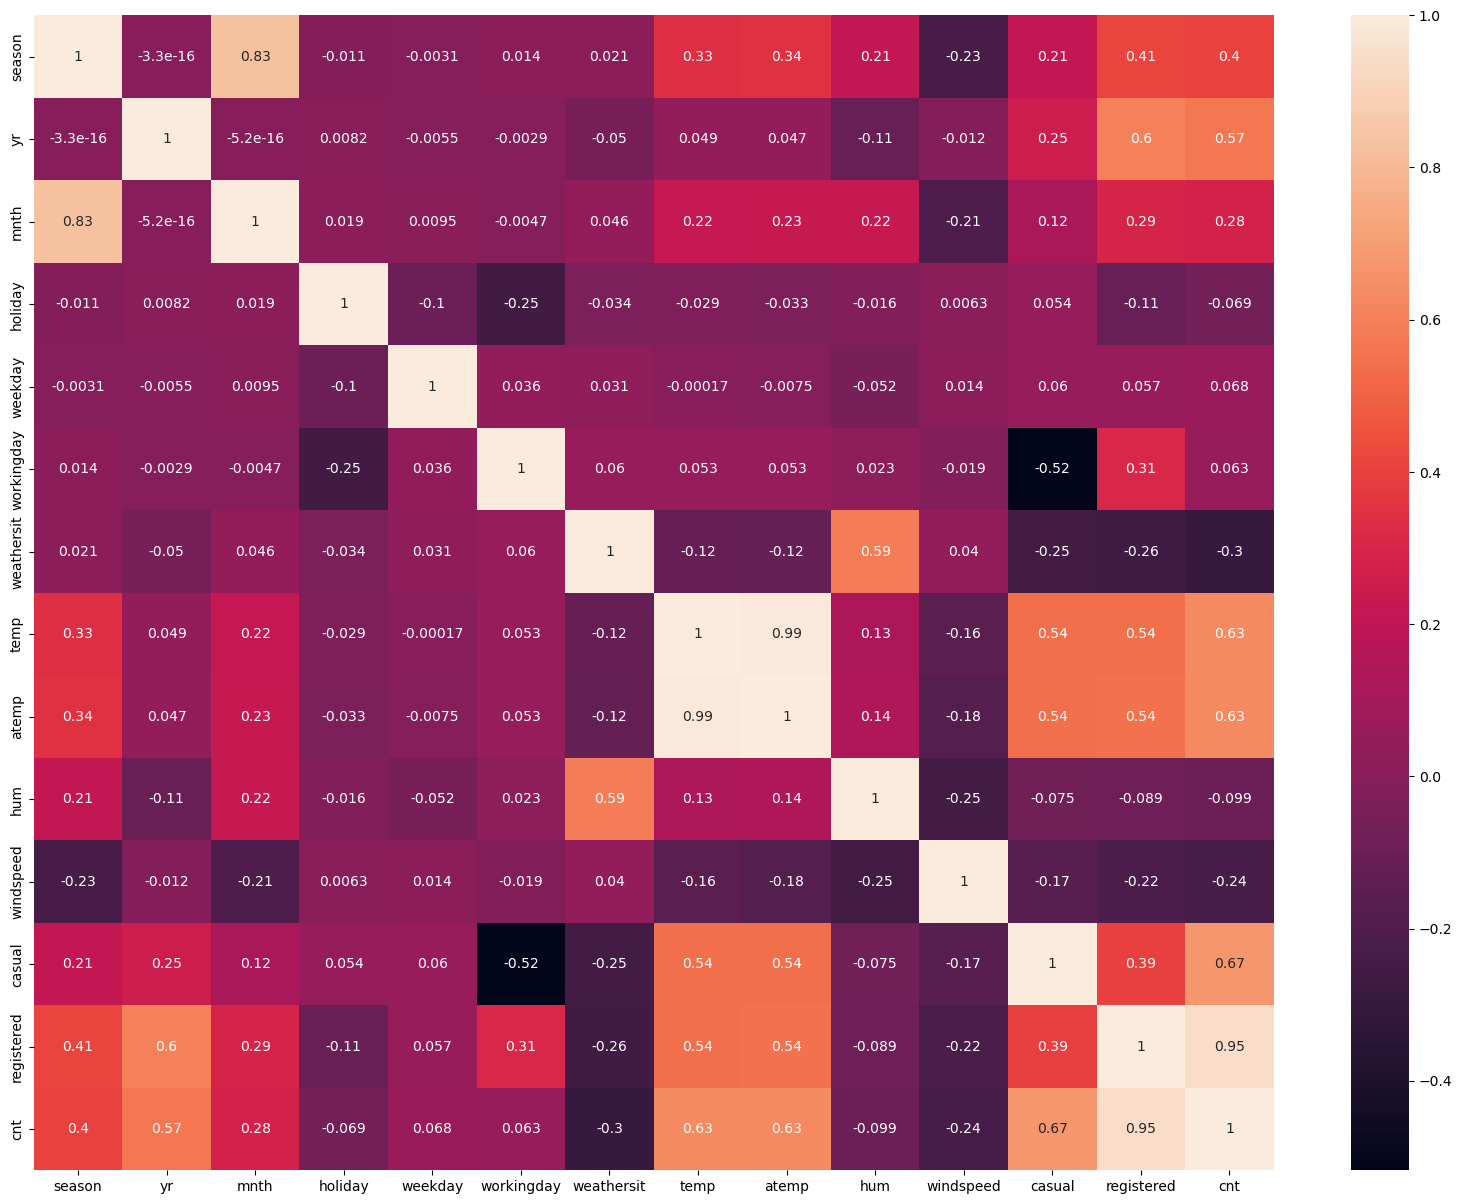

In [1118]:
# Draw to heatmap to observe the correlation between columns
plt.figure(figsize=(20,15))
sns.heatmap(bike.corr(),annot=True)
plt.show()

### Observation from heat map

Below columns has positive correlation

season,yr,month,temp,atemp,casual,registered,cnt

# Step3: Data Preparation

Converting catelogical columns

In [1121]:
# get the dummy values for weathersit column 
weather = pd.get_dummies(bike['weathersit'],prefix='weather', dtype=int, drop_first='true')
weather = weather.rename(columns={'weather_1': 'Clear', 'weather_2': 'Mist','weather_3': 'light_snow_rain'})
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Mist             730 non-null    int32
 1   light_snow_rain  730 non-null    int32
dtypes: int32(2)
memory usage: 5.8 KB


In [1122]:
weather.describe()

,Mist,light_snow_rain
count,730.000000,730.000000
mean,0.336986,0.028767
std,0.473004,0.167266
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,1.000000,0.000000
max,1.000000,1.000000


In [1123]:
# Check what are the distinct values in weathersit column
bike['weathersit'].value_counts()

weathersit
1    463
2    246
3     21
Name: count, dtype: int64

In [1124]:
# Add the results to the original dataframe and drop the first column
bike = pd.concat([bike, weather], axis = 1)
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,Mist,light_snow_rain
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,1,0
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,1,0
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,0,0
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,0,0
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,0,0


In [1125]:
# Remove the column weathersit as we are capturing same data in Mist, light_snow_rain
bike = bike.drop('weathersit', axis=1)
bike.head()

,season,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,Mist,light_snow_rain
0,1,0,1,0,6,0,14.110847,18.18125,80.5833,10.749882,331,654,985,1,0
1,1,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,131,670,801,1,0
2,1,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,0,0
3,1,0,1,0,2,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,0,0
4,1,0,1,0,3,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,0,0


In [1126]:
# get the dummy values for season column
season = pd.get_dummies(bike['season'], prefix='season', dtype=int,drop_first = True)

season = season.rename(columns={'season_1': 'spring', 'season_2': 'summer','season_3': 'fall', 'season_4' : 'winter'})
season.head()

,summer,fall,winter
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [1127]:
# Add the results to the original bike dataframe
bike = pd.concat([bike, season], axis = 1)
bike.head()

,season,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,Mist,light_snow_rain,summer,fall,winter
0,1,0,1,0,6,0,14.110847,18.18125,80.5833,10.749882,331,654,985,1,0,0,0,0
1,1,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,131,670,801,1,0,0,0,0
2,1,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,0,0,0,0,0
3,1,0,1,0,2,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,0,0,0,0,0
4,1,0,1,0,3,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,0,0,0,0,0


In [1128]:
# Remove the column season as we are capturing same data in columns summer, fall, winter
bike = bike.drop('season', axis=1)
bike.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,Mist,light_snow_rain,summer,fall,winter
0,0,1,0,6,0,14.110847,18.18125,80.5833,10.749882,331,654,985,1,0,0,0,0
1,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,131,670,801,1,0,0,0,0
2,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,0,0,0,0,0
3,0,1,0,2,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,0,0,0,0,0
4,0,1,0,3,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,0,0,0,0,0


In [1129]:
# converting month to dummy variable
#bike['mnth'] = bike['mnth'].str.replace(r'[\xa0]',"")  
bike.mnth = bike.mnth.map({1:'jan', 2:'feb', 3:'mar',4:'apr',5:'may',6:'jun',
                     7:'jul',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

In [1130]:
bike.mnth.value_counts()

mnth
jan    62
mar    62
may    62
jul    62
aug    62
oct    62
dec    62
apr    60
jun    60
sep    60
nov    60
feb    56
Name: count, dtype: int64

In [1131]:
bike.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,Mist,light_snow_rain,summer,fall,winter
0,0,jan,0,6,0,14.110847,18.18125,80.5833,10.749882,331,654,985,1,0,0,0,0
1,0,jan,0,0,0,14.902598,17.68695,69.6087,16.652113,131,670,801,1,0,0,0,0
2,0,jan,0,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,0,0,0,0,0
3,0,jan,0,2,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,0,0,0,0,0
4,0,jan,0,3,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,0,0,0,0,0


In [1132]:
month = pd.get_dummies(bike['mnth'], dtype=int,drop_first = True)
month.head()

,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [1133]:
# concat month dataframe with bike dataframe
bike = pd.concat([bike,month], axis=1)
bike.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,0,jan,0,6,0,14.110847,18.18125,80.5833,10.749882,331,...,0,0,1,0,0,0,0,0,0,0
1,0,jan,0,0,0,14.902598,17.68695,69.6087,16.652113,131,...,0,0,1,0,0,0,0,0,0,0
2,0,jan,0,1,1,8.050924,9.47025,43.7273,16.636703,120,...,0,0,1,0,0,0,0,0,0,0
3,0,jan,0,2,1,8.200000,10.60610,59.0435,10.739832,108,...,0,0,1,0,0,0,0,0,0,0
4,0,jan,0,3,1,9.305237,11.46350,43.6957,12.522300,82,...,0,0,1,0,0,0,0,0,0,0


In [1134]:
# Remove the column mnth as we are capturing same data in columns indivitual month columns
bike = bike.drop('mnth', axis=1)
bike.head()

,yr,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,0,0,6,0,14.110847,18.18125,80.5833,10.749882,331,654,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,14.902598,17.68695,69.6087,16.652113,131,670,...,0,0,1,0,0,0,0,0,0,0
2,0,0,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,...,0,0,1,0,0,0,0,0,0,0
3,0,0,2,1,8.200000,10.60610,59.0435,10.739832,108,1454,...,0,0,1,0,0,0,0,0,0,0
4,0,0,3,1,9.305237,11.46350,43.6957,12.522300,82,1518,...,0,0,1,0,0,0,0,0,0,0


In [1135]:
# converting weekday to dummy variable  
bike.weekday = bike.weekday.map({1: 'Wed', 2: 'Thurs', 3: 'Fri', 4: 'Sat', 5: 'Sun', 6: 'Mon', 0: 'Tues'})
bike.head()

,yr,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,0,0,Mon,0,14.110847,18.18125,80.5833,10.749882,331,654,...,0,0,1,0,0,0,0,0,0,0
1,0,0,Tues,0,14.902598,17.68695,69.6087,16.652113,131,670,...,0,0,1,0,0,0,0,0,0,0
2,0,0,Wed,1,8.050924,9.47025,43.7273,16.636703,120,1229,...,0,0,1,0,0,0,0,0,0,0
3,0,0,Thurs,1,8.200000,10.60610,59.0435,10.739832,108,1454,...,0,0,1,0,0,0,0,0,0,0
4,0,0,Fri,1,9.305237,11.46350,43.6957,12.522300,82,1518,...,0,0,1,0,0,0,0,0,0,0


In [1136]:
# concat weekday dataframe with bike dataframe
weekday = pd.get_dummies(bike['weekday'], dtype=int,drop_first = True)
weekday.head()

bike = pd.concat([bike,weekday], axis=1)
bike.head()

,yr,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,...,may,nov,oct,sep,Mon,Sat,Sun,Thurs,Tues,Wed
0,0,0,Mon,0,14.110847,18.18125,80.5833,10.749882,331,654,...,0,0,0,0,1,0,0,0,0,0
1,0,0,Tues,0,14.902598,17.68695,69.6087,16.652113,131,670,...,0,0,0,0,0,0,0,0,1,0
2,0,0,Wed,1,8.050924,9.47025,43.7273,16.636703,120,1229,...,0,0,0,0,0,0,0,0,0,1
3,0,0,Thurs,1,8.200000,10.60610,59.0435,10.739832,108,1454,...,0,0,0,0,0,0,0,1,0,0
4,0,0,Fri,1,9.305237,11.46350,43.6957,12.522300,82,1518,...,0,0,0,0,0,0,0,0,0,0


In [1137]:
# Remove the column mnth as we are capturing same data in columns indivitual month columns
bike = bike.drop('weekday', axis=1)
bike.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,...,may,nov,oct,sep,Mon,Sat,Sun,Thurs,Tues,Wed
0,0,0,0,14.110847,18.18125,80.5833,10.749882,331,654,985,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,131,670,801,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,...,0,0,0,0,0,0,0,0,0,1
3,0,0,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,...,0,0,0,0,0,0,0,0,0,0


In [1138]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 32 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   yr               730 non-null    int64  
 1   holiday          730 non-null    int64  
 2   workingday       730 non-null    int64  
 3   temp             730 non-null    float64
 4   atemp            730 non-null    float64
 5   hum              730 non-null    float64
 6   windspeed        730 non-null    float64
 7   casual           730 non-null    int64  
 8   registered       730 non-null    int64  
 9   cnt              730 non-null    int64  
 10  Mist             730 non-null    int32  
 11  light_snow_rain  730 non-null    int32  
 12  summer           730 non-null    int32  
 13  fall             730 non-null    int32  
 14  winter           730 non-null    int32  
 15  aug              730 non-null    int32  
 16  dec              730 non-null    int32  
 17  feb             

In [1139]:
# Remove the column atemp as we are capturing same kind of data in temp column
bike = bike.drop('atemp', axis=1)
bike.head()

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,Mist,...,may,nov,oct,sep,Mon,Sat,Sun,Thurs,Tues,Wed
0,0,0,0,14.110847,80.5833,10.749882,331,654,985,1,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,14.902598,69.6087,16.652113,131,670,801,1,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,8.050924,43.7273,16.636703,120,1229,1349,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,1,8.200000,59.0435,10.739832,108,1454,1562,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,9.305237,43.6957,12.522300,82,1518,1600,0,...,0,0,0,0,0,0,0,0,0,0


In [1140]:
# In the dataset, we have casual and registered users. Sum of these 2 columns gives cnt, target column.
# Using one of the variable registered and dropping casual column
bike = bike.drop('casual', axis=1)
bike.head()

,yr,holiday,workingday,temp,hum,windspeed,registered,cnt,Mist,light_snow_rain,...,may,nov,oct,sep,Mon,Sat,Sun,Thurs,Tues,Wed
0,0,0,0,14.110847,80.5833,10.749882,654,985,1,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,14.902598,69.6087,16.652113,670,801,1,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,8.050924,43.7273,16.636703,1229,1349,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,1,8.200000,59.0435,10.739832,1454,1562,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,9.305237,43.6957,12.522300,1518,1600,0,0,...,0,0,0,0,0,0,0,0,0,0


In [1141]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   yr               730 non-null    int64  
 1   holiday          730 non-null    int64  
 2   workingday       730 non-null    int64  
 3   temp             730 non-null    float64
 4   hum              730 non-null    float64
 5   windspeed        730 non-null    float64
 6   registered       730 non-null    int64  
 7   cnt              730 non-null    int64  
 8   Mist             730 non-null    int32  
 9   light_snow_rain  730 non-null    int32  
 10  summer           730 non-null    int32  
 11  fall             730 non-null    int32  
 12  winter           730 non-null    int32  
 13  aug              730 non-null    int32  
 14  dec              730 non-null    int32  
 15  feb              730 non-null    int32  
 16  jan              730 non-null    int32  
 17  jul             

# Step 4: Splitting the data into test and train datasets

In [1143]:
# we need to build model using train data test and test the model using test data set. So will split data into 70:30
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(bike, train_size = 0.7, test_size = 0.3, random_state = 100)

In [1144]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 510 entries, 653 to 79
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   yr               510 non-null    int64  
 1   holiday          510 non-null    int64  
 2   workingday       510 non-null    int64  
 3   temp             510 non-null    float64
 4   hum              510 non-null    float64
 5   windspeed        510 non-null    float64
 6   registered       510 non-null    int64  
 7   cnt              510 non-null    int64  
 8   Mist             510 non-null    int32  
 9   light_snow_rain  510 non-null    int32  
 10  summer           510 non-null    int32  
 11  fall             510 non-null    int32  
 12  winter           510 non-null    int32  
 13  aug              510 non-null    int32  
 14  dec              510 non-null    int32  
 15  feb              510 non-null    int32  
 16  jan              510 non-null    int32  
 17  jul              510

In [1145]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 219 entries, 184 to 72
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   yr               219 non-null    int64  
 1   holiday          219 non-null    int64  
 2   workingday       219 non-null    int64  
 3   temp             219 non-null    float64
 4   hum              219 non-null    float64
 5   windspeed        219 non-null    float64
 6   registered       219 non-null    int64  
 7   cnt              219 non-null    int64  
 8   Mist             219 non-null    int32  
 9   light_snow_rain  219 non-null    int32  
 10  summer           219 non-null    int32  
 11  fall             219 non-null    int32  
 12  winter           219 non-null    int32  
 13  aug              219 non-null    int32  
 14  dec              219 non-null    int32  
 15  feb              219 non-null    int32  
 16  jan              219 non-null    int32  
 17  jul              219

In [1146]:
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,registered,cnt,Mist,light_snow_rain,...,may,nov,oct,sep,Mon,Sat,Sun,Thurs,Tues,Wed
653,1,0,1,19.201653,55.8333,12.208807,6612,7534,0,0,...,0,0,1,0,0,0,0,1,0,0
576,1,0,1,29.246653,70.4167,11.083475,6248,7216,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,16.980847,62.1250,10.792293,3110,4066,1,0,...,0,0,0,0,1,0,0,0,0,0
728,1,0,0,10.489153,48.3333,23.500518,1432,1796,0,0,...,0,0,0,0,0,0,0,0,1,0
482,1,0,0,15.443347,48.9583,8.708325,3100,4220,1,0,...,0,0,0,0,1,0,0,0,0,0


## Rescaling the Features

From the data, we can see temp, hum, windspeed, registered and cnt have larger and decimal values compared to others. We can normalized the numbers using the MinMax method.

In [1148]:
from sklearn.preprocessing import MinMaxScaler

In [1149]:
scaler = MinMaxScaler()

In [1150]:
# Apply scaler() to all the below columns 
num_vars = ['temp', 'hum', 'windspeed', 'registered', 'cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,registered,cnt,Mist,light_snow_rain,...,may,nov,oct,sep,Mon,Sat,Sun,Thurs,Tues,Wed
653,1,0,1,0.509887,0.575354,0.300794,0.951776,0.864243,0,0,...,0,0,1,0,0,0,0,1,0,0
576,1,0,1,0.815169,0.725633,0.264686,0.899220,0.827658,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.446145,0.465255,1,0,...,0,0,0,0,1,0,0,0,0,0
728,1,0,0,0.245101,0.498067,0.663106,0.203869,0.204096,0,0,...,0,0,0,0,0,0,0,0,1,0
482,1,0,0,0.395666,0.504508,0.188475,0.444701,0.482973,1,0,...,0,0,0,0,1,0,0,0,0,0


In [1151]:
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,registered,cnt,Mist,light_snow_rain,...,may,nov,oct,sep,Mon,Sat,Sun,Thurs,Tues,Wed
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.650369,0.320768,0.523944,0.513620,0.343137,0.029412,...,0.084314,0.086275,0.086275,0.080392,0.154902,0.133333,0.127451,0.131373,0.143137,0.150980
std,0.500429,0.157763,0.468282,0.225844,0.145882,0.169797,0.228175,0.224593,0.475223,0.169124,...,0.278131,0.281045,0.281045,0.272166,0.362166,0.340268,0.333805,0.338139,0.350557,0.358381
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.353487,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.525123,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.696073,0.684710,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


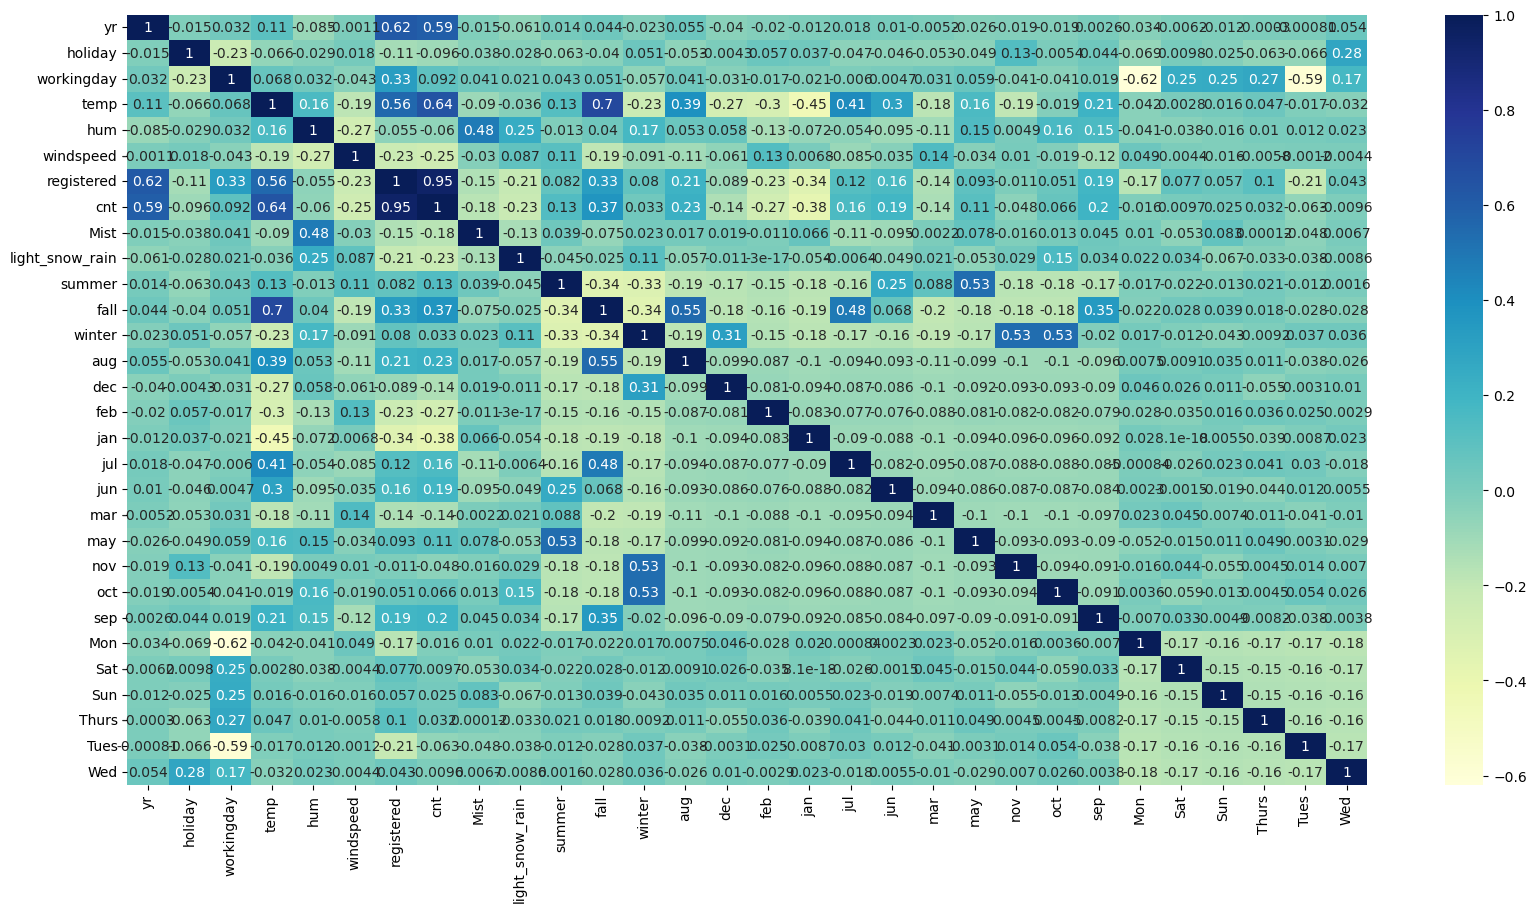

In [1152]:
# Will draw heat map to check which variables are highly correlated

plt.figure(figsize = (20, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

# Building model with RFE

In [1154]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

## Dividing into X and Y sets for the model building


In [1156]:
X_train = df_train
y_train = df_train.pop('cnt')

In [1157]:
# list the columns in dataset
bike.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'registered',
       'cnt', 'Mist', 'light_snow_rain', 'summer', 'fall', 'winter', 'aug',
       'dec', 'feb', 'jan', 'jul', 'jun', 'mar', 'may', 'nov', 'oct', 'sep',
       'Mon', 'Sat', 'Sun', 'Thurs', 'Tues', 'Wed'],
      dtype='object')

In [1158]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, step=15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [1159]:
# check the ranking of the columns
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', False, 2),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', False, 2),
 ('windspeed', True, 1),
 ('registered', True, 1),
 ('Mist', False, 2),
 ('light_snow_rain', True, 1),
 ('summer', False, 2),
 ('fall', False, 2),
 ('winter', False, 2),
 ('aug', False, 2),
 ('dec', True, 1),
 ('feb', True, 1),
 ('jan', True, 1),
 ('jul', False, 2),
 ('jun', False, 2),
 ('mar', False, 2),
 ('may', False, 2),
 ('nov', True, 1),
 ('oct', True, 1),
 ('sep', False, 2),
 ('Mon', True, 1),
 ('Sat', False, 2),
 ('Sun', True, 1),
 ('Thurs', False, 2),
 ('Tues', True, 1),
 ('Wed', False, 2)]

In [1160]:
cols = X_train.columns[rfe.support_]
cols

Index(['holiday', 'workingday', 'temp', 'windspeed', 'registered',
       'light_snow_rain', 'dec', 'feb', 'jan', 'nov', 'oct', 'Mon', 'Sun',
       'Tues'],
      dtype='object')

In [1161]:
# Now need to build model using the columns filterted from RFE process using statsmodel

## checking VIF

In [1163]:
# check VIF for all feature variables
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [1164]:
#Build a linear model with rfe varaibles

import statsmodels.api as sm

X_train_rfe = X_train[cols] 

X_train_sm = sm.add_constant(X_train_rfe)

lm = sm.OLS(y_train,X_train_sm).fit()
#lm.params

# Print a summary of the linear regression model  
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                     1271.
Date:                Sun, 22 Sep 2024   Prob (F-statistic):               0.00
Time:                        16:58:33   Log-Likelihood:                 940.16
No. Observations:                 510   AIC:                            -1852.
Df Residuals:                     496   BIC:                            -1793.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0440      0.008     

In [1165]:
# Create a new dataframe which contains all VIF vaues
vif = pd.DataFrame()
vif['features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,features,VIF
1,workingday,24.56
11,Mon,5.89
13,Tues,5.46
2,temp,2.85
4,registered,1.97
0,holiday,1.90
8,jan,1.86
6,dec,1.47
7,feb,1.46
9,nov,1.37


In [1166]:
#Build a linear model with rfe varaibles except oct columns

import statsmodels.api as sm

X_train_rfe1 = X_train_rfe.drop('oct', axis=1)

X_train_sm1 = sm.add_constant(X_train_rfe1)

lm = sm.OLS(y_train,X_train_sm1).fit()
#lm.params

# Print a summary of the linear regression model  
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                     1378.
Date:                Sun, 22 Sep 2024   Prob (F-statistic):               0.00
Time:                        16:58:33   Log-Likelihood:                 939.72
No. Observations:                 510   AIC:                            -1853.
Df Residuals:                     497   BIC:                            -1798.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0419      0.008     

In [1167]:
# Create a new dataframe which contains all VIF vaues
vif = pd.DataFrame()
vif['features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,features,VIF
1,workingday,23.25
10,Mon,5.52
12,Tues,5.03
2,temp,2.62
4,registered,1.93
0,holiday,1.82
8,jan,1.75
7,feb,1.39
6,dec,1.38
9,nov,1.29


In [1168]:
#Build a linear model with rfe varaibles except oct columns

import statsmodels.api as sm

X_train_rfe2 = X_train_rfe1.drop('holiday', axis=1)

X_train_sm2 = sm.add_constant(X_train_rfe2)

lm = sm.OLS(y_train,X_train_sm2).fit()
#lr.params

# Print a summary of the linear regression model  
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                     1378.
Date:                Sun, 22 Sep 2024   Prob (F-statistic):               0.00
Time:                        16:58:34   Log-Likelihood:                 939.72
No. Observations:                 510   AIC:                            -1853.
Df Residuals:                     497   BIC:                            -1798.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0494      0.015     

In [1169]:
# Create a new dataframe which contains all VIF vaues
vif = pd.DataFrame()
vif['features'] = X_train_rfe2.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe2.values, i) for i in range(X_train_rfe2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,features,VIF
0,workingday,13.94
1,temp,13.55
3,registered,11.80
2,windspeed,4.37
9,Mon,3.57
11,Tues,3.27
7,jan,1.53
5,dec,1.33
6,feb,1.30
10,Sun,1.24


In [1170]:
#Build a linear model with rfe varaibles except oct columns
X_train_rfe3 = X_train_rfe2.drop('light_snow_rain', axis=1)

X_train_sm3 = sm.add_constant(X_train_rfe3)

lm = sm.OLS(y_train,X_train_sm3).fit()
#lm.params

# Print a summary of the linear regression model  
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                     1491.
Date:                Sun, 22 Sep 2024   Prob (F-statistic):               0.00
Time:                        16:58:34   Log-Likelihood:                 937.20
No. Observations:                 510   AIC:                            -1850.
Df Residuals:                     498   BIC:                            -1800.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0473      0.015      3.249      0.0

In [1171]:
# Create a new dataframe which contains all VIF vaues
vif = pd.DataFrame()
vif['features'] = X_train_rfe3.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe3.values, i) for i in range(X_train_rfe3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,features,VIF
0,workingday,13.48
1,temp,13.46
3,registered,10.96
2,windspeed,4.36
8,Mon,3.51
10,Tues,3.24
6,jan,1.51
4,dec,1.33
5,feb,1.30
9,Sun,1.23


In [1172]:
#Build a linear model with rfe varaibles except oct columns
X_train_rfe3['Mist'] = X_train['Mist']

X_train_sm4 = sm.add_constant(X_train_rfe3)

lm = sm.OLS(y_train,X_train_sm4).fit()
#lm.params

# Print a summary of the linear regression model  
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                     1380.
Date:                Sun, 22 Sep 2024   Prob (F-statistic):               0.00
Time:                        16:58:34   Log-Likelihood:                 940.11
No. Observations:                 510   AIC:                            -1854.
Df Residuals:                     497   BIC:                            -1799.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0520      0.015      3.557      0.0

In [1173]:
# Drop the constant column 

#X_train_sm4 = X_train_sm4.drop(['const'], axis=1)

In [1174]:
# Create a new dataframe which contains all VIF vaues
vif = pd.DataFrame()
vif['features'] = X_train_sm4.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm4.values, i) for i in range(X_train_sm4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,features,VIF
0,const,72.35
1,workingday,9.40
9,Mon,6.15
11,Tues,5.79
2,temp,2.62
4,registered,1.83
7,jan,1.73
6,feb,1.39
5,dec,1.38
8,nov,1.29


## Residual Analysis of the train data

To check if the error terms are also normally distributed

In [1176]:
#lm.params
#X_train_sm4.columns
y_train_cnt = lm.predict(X_train_sm4)

C:\Users\PC\AppData\Local\Temp\ipykernel_7432\4196452602.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_train - y_train_cnt), bins = 20)


Text(0.5, 0, 'Errors')

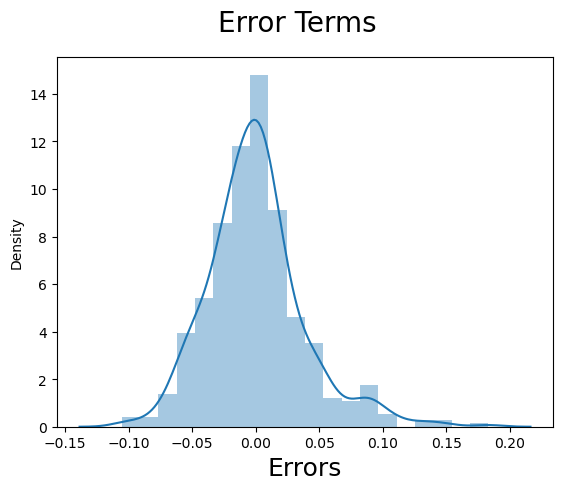

In [1177]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)   

## Evalution with Test data set

In [1179]:
## Scaling of test data set

# Apply scaler() to all the below columns 
num_vars = ['temp', 'hum', 'windspeed', 'registered', 'cnt']

df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

df_test.head()

,yr,holiday,workingday,temp,hum,windspeed,registered,cnt,Mist,light_snow_rain,...,may,nov,oct,sep,Mon,Sat,Sun,Thurs,Tues,Wed
184,0,1,0,0.837241,0.534223,0.149393,0.397068,0.704300,1,0,...,0,0,0,0,0,0,0,0,0,1
535,1,0,1,0.911423,0.470417,0.231142,0.765284,0.725421,0,0,...,0,0,0,0,0,0,0,0,0,0
299,0,0,1,0.496221,0.777843,0.443398,0.309888,0.278853,1,0,...,0,0,1,0,0,1,0,0,0,0
221,0,0,1,0.890387,0.236659,0.449707,0.540237,0.545512,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,1,0.821739,0.070765,0.682387,0.592639,0.569148,0,0,...,0,0,0,0,0,1,0,0,0,0


In [1180]:
# Dividing X and y dataframes from test data set
X_test = df_test
y_test = df_test.pop('cnt')

In [1181]:
X_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,registered,Mist,light_snow_rain,summer,...,may,nov,oct,sep,Mon,Sat,Sun,Thurs,Tues,Wed
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.546312,0.508750,0.418870,0.505149,0.319635,0.027397,0.264840,...,0.086758,0.073059,0.082192,0.086758,0.118721,0.164384,0.178082,0.164384,0.146119,0.127854
std,0.500722,0.188034,0.459904,0.249189,0.201253,0.188111,0.235390,0.467403,0.163612,0.442259,...,0.282125,0.260830,0.275286,0.282125,0.324202,0.371472,0.383458,0.371472,0.354034,0.334692
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.328479,0.358469,0.283817,0.323690,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.546045,0.494200,0.402533,0.504523,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759735,0.651165,0.524362,0.653774,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [1182]:
y_test.describe()

count    219.000000
mean       0.516216
std        0.238702
min        0.000000
25%        0.359882
50%        0.520241
75%        0.682487
max        1.000000
Name: cnt, dtype: float64

In [1183]:
X_train_new = X_train_sm4.drop('const', axis=1)

In [1184]:
# Filter X_test with as many as columns like X_train_rfe3

X_test_new = X_test[X_train_new.columns]

In [1185]:
# Predict Y values from X_test_new

X_test_sm = sm.add_constant(X_test_new)
y_tpredict = lm.predict(X_test_sm)

## Evaluation of Model

Text(0, 0.5, 'Predict')

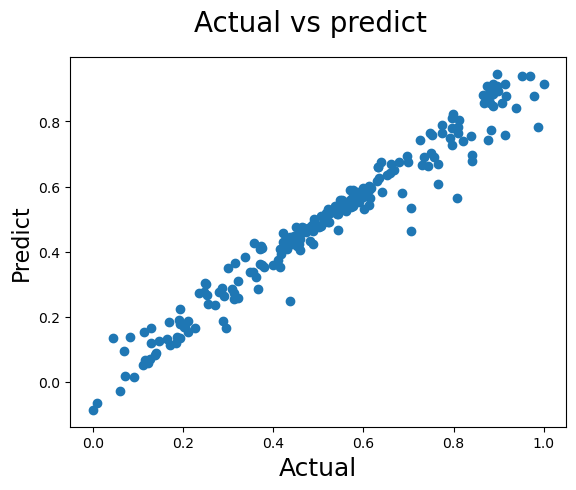

In [1192]:
# Plotting y_test and y_pred  
fig = plt.figure()
plt.scatter(y_test,y_tpredict)
fig.suptitle('Actual vs predict', fontsize=20)              # Plot heading 
plt.xlabel('Actual', fontsize=18)                          # X-label
plt.ylabel('Predict', fontsize=16)     


In [1194]:
from sklearn.metrics import r2_score
r2_score(y_test, y_tpredict)

0.9450628006947968

### Summary
Evaluated the model on test data with 94.5 % accuracy.